L'objectif de ce TP est de manipuler les modèles de régression linéaire simple et multiples:
- Calcul des coefficients de la droite de regression lineaire
- Calcul du coefficient de determination R2


### Regression lineaire simple

Question 1 : Charger le fichier Salary_Data.csv

In [45]:
import pandas as pd 

Salary = pd.read_csv('Salary_Data.csv')
Salary 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Question 2: Diviser la base de données en 2/3 Train et 1/3 Test

In [63]:
from sklearn.model_selection import train_test_split

X = Salary.drop(['Salary'],axis = 1)
y = Salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(Salary.YearsExperience, Salary.Salary, test_size = 0.33, random_state = 0)

X_train.shape, X_test.shape

((20,), (10,))

Question 3 : Représenter sous forme de nuages de points la variable dépendente Salary en fonction de la variable indépendente YearsExperience

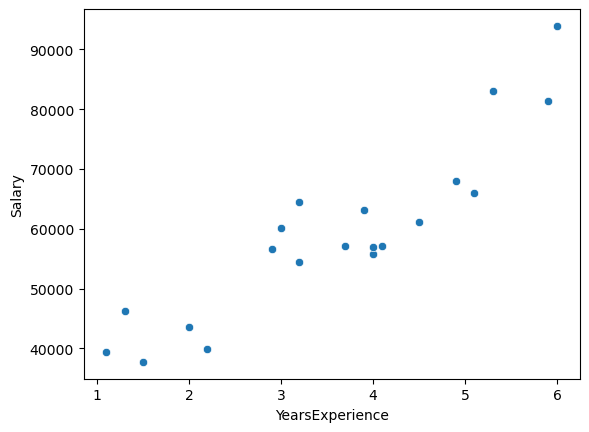

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt 


sns.scatterplot(data = Salary.iloc[:20,:], x = 'YearsExperience', y = 'Salary' )


plt.show()

Question 4 : Calculer l'indice de correlation entre YearExperience et Salary

In [65]:
corr = Salary['YearsExperience'].corr(Salary['Salary'])
print('Correlation entre YearsExperience & Salary :', corr)

Correlation entre YearsExperience & Salary : 0.9782416184887599


In [66]:
import numpy as np
def correlation(X, y):
    
    return (np.mean(X*y) - np.mean(X) * np.mean(y)) / (np.std(X) * np.std(y)) 

corr = correlation(Salary.YearsExperience, Salary.Salary )
corr

0.9782416184887603

Question 4 : Caculer les coefficients de la droite de régression en se basant sur la methode des moindres carres (Least Square Error)

In [69]:
coeff = (np.mean(X_train*y_train) - (np.mean(X_train) * np.mean(y_train)))  / np.var(X_train)

intercept = np.mean(y_train)  - coeff * np.mean(X_train)
coeff

9345.942443122372

Question 5 : Calculer les coefficients de la droite de regression lineaire en utilisant la librairie sickit-learn

In [31]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

model.fit(X_train, y_train)


b0 = model.coef_ 
b1 = model.intercept_

b0, b1

(array([9345.94244312]), 26816.19224403119)

Question 6 : Afficher la droite de regression lineaire

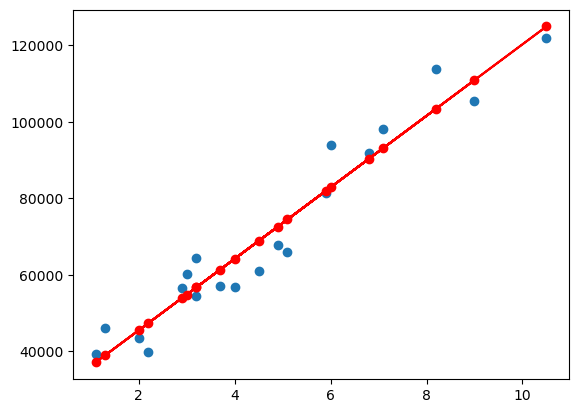

In [90]:
F = b0 * X_train + b1
plt.scatter(X_train, y_train )
plt.scatter(X_train, F, c='r')
plt.plot(X_train, F, c='r')
plt.show()


Question 7 : Calculer le coefficient de determination R-squared (R2=1 - SSE/SST) sur la base d'apprentissage puis sur la base de test

In [70]:
# ssr = sum of square of residuals (somme des carrés des résidus)
SSR = np.sum((y_pred - y_test)**2)
#  sst = total sum of squares (somme totale des carrés)
SST = np.sum((y_test - np.mean(y_test))**2)
# Score R2
R2_score = 1 - (SSR/SST)

R2_score

0.9749154407708353

Question 8 : Calculer le coefficient de determination R2 en utilisant la librairie sickit-learn sur la base d'apprentissage puis de test

In [76]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test.to_numpy().reshape(-1,1))

r2 = r2_score(y_test.to_numpy().reshape(-1,1), y_pred)
r2

0.9749154407708353

### Regression lineaire multiple

Question 1: Charger le fichier 50_startups.csv
- La variable Profit est la variable dépendente
- La base ne contient aucune valeur manquante

In [155]:
data = pd.read_csv('50_startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Question 2 : Appliquer les pretraitements nécessaires
- Conversion des variables catégoriques en numériques

In [156]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [157]:
data = pd.get_dummies(data, drop_first = True) 
data = data.reindex(columns = ['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York','Profit'])
data.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94


Question 3 : Diviser la base de données en train (80%) et test (20%)

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']], data.Profit, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 5), (10, 5), (40,), (10,))

Question 4:
* Executer l'apprentissage du modèle de regression lineaire et calculer la prediction sur la base de test
* Calculer le coefficient R-squared
* Afficher les variables y_test et y_pred dans un nouveau Dataframe df_pred

In [159]:
from sklearn.linear_model import LinearRegression 

Model = LinearRegression()
Model.fit(X_train, y_train )

y_pred = Model.predict(X_test)

df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
df

,y_test,y_pred
8,152211.77,151659.176823
14,132602.65,149952.234181
2,191050.39,182235.754532
41,77798.83,75954.836201
43,69758.98,61525.503484
48,35673.41,51370.812339
21,111313.02,117032.744320
0,192261.83,191732.254643
13,134307.35,126665.166273
32,97427.84,99449.974600


Question 5 : En utilisant sklearn, calculer les coefficients (b0, b1, b2, b3, b4, b5) de la régression lineaire multiple

In [160]:
b0 = Model.intercept_
b1, b2, b3, b4, b5 = Model.coef_
b0, b1, b2, b3, b4, b5

(51697.19903224062,
 0.8113427977962265,
 -0.0359200063214926,
 0.020571069886015803,
 1286.3903419719968,
 1092.4392183237203)

Question 6 : Utiliser **statsmodels.api** pour calculer la valeur p_value de chaque variable independente

In [164]:
import statsmodels.api as sm
X = data[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
y = data.Profit
X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.34e-27
Time:                        16:26:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820     

Question 7 : En se basant sur la methode d'elimination Backward, garder uniquement les variables independente qui ont une valeur de p_value < 0.05

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.34e-27
Time:                        22:09:53   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Const            5.013e+04   6884.820     

In [141]:
variables_to_keep = [var for var, p_value in zip(X_train.columns, p_values) if p_value < 0.05]

X_train_filtered = X_train[variables_to_keep]

Model.fit(X_train_filtered, y_train)

y_pred_filtered = Model.predict(X_test[variables_to_keep])

r_squared_filtered = r2_score(y_test, y_pred_filtered)

print("R-squared (filtered model):", r_squared_filtered)


R-squared (filtered model): 0.9885338661816274


In [162]:

eliminated_vars = []

while True:
    
    model = sm.OLS(y_train, sm.add_constant(X_train))
    results = model.fit()
    print(results.summary())

    p_values = results.pvalues[1:]  
    
    # Find the variable with the highest p-value
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        # Remove the variable with the highest p-value
        var_to_remove = p_values.idxmax()
        X_train = X_train.drop(var_to_remove, axis=1)
        eliminated_vars.append(var_to_remove)
    else:
        break



                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.07e-20
Time:                        15:54:11   Log-Likelihood:                -420.46
No. Observations:                  40   AIC:                             852.9
Df Residuals:                      34   BIC:                             863.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             5.17e+04   8853.777     

In [145]:
model1 = sm.OLS(y_train, sm.add_constant(X_train))
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     99.47
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.70e-19
Time:                        15:41:00   Log-Likelihood:                -423.97
No. Observations:                  40   AIC:                             859.9
Df Residuals:                      34   BIC:                             870.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.092e+04   8977.022      5.672      0.000    3.27e+04    6.92e+04
R&D Spend           0.8156      0.054     15.023      0.000       0.705       0.926
Administration     -0.0338      0.068     -0.494      0.625      -0.173       0.105
Marketing Spend     0.0204      0.021      0.969      0.339      -0.022       0.063
State_Florida    1911.7040   4286.313      0.446      0.658   -6799.133    1.06e+04
State_New York    659.1000   4082.928      0.161      0.873   -7638.408    8956.608
==============================================================================
Omnibus:                       10.796   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.878
Skew:                          -0.952   Prob(JB):                      0.00434
Kurtosis:                       4.702   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""